Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Loading data files

In [2]:
movies=pd.read_csv('/content/drive/MyDrive/MOVIE RECOMMENDATION/movies.csv')
ratings=pd.read_csv('/content/drive/MyDrive/MOVIE RECOMMENDATION/ratings.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [5]:
movies.shape

(10329, 3)

In [6]:
ratings.shape

(105339, 4)

In [7]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


From the above table we can conclue that

* The average rating is 3.5 and minimum and
maximum rating is 0.5 and 5 respectively.
* There are 668 user who has given their ratings for 149532 movies.

In [9]:
genres=[]
for genre in movies.genres:

    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [16]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

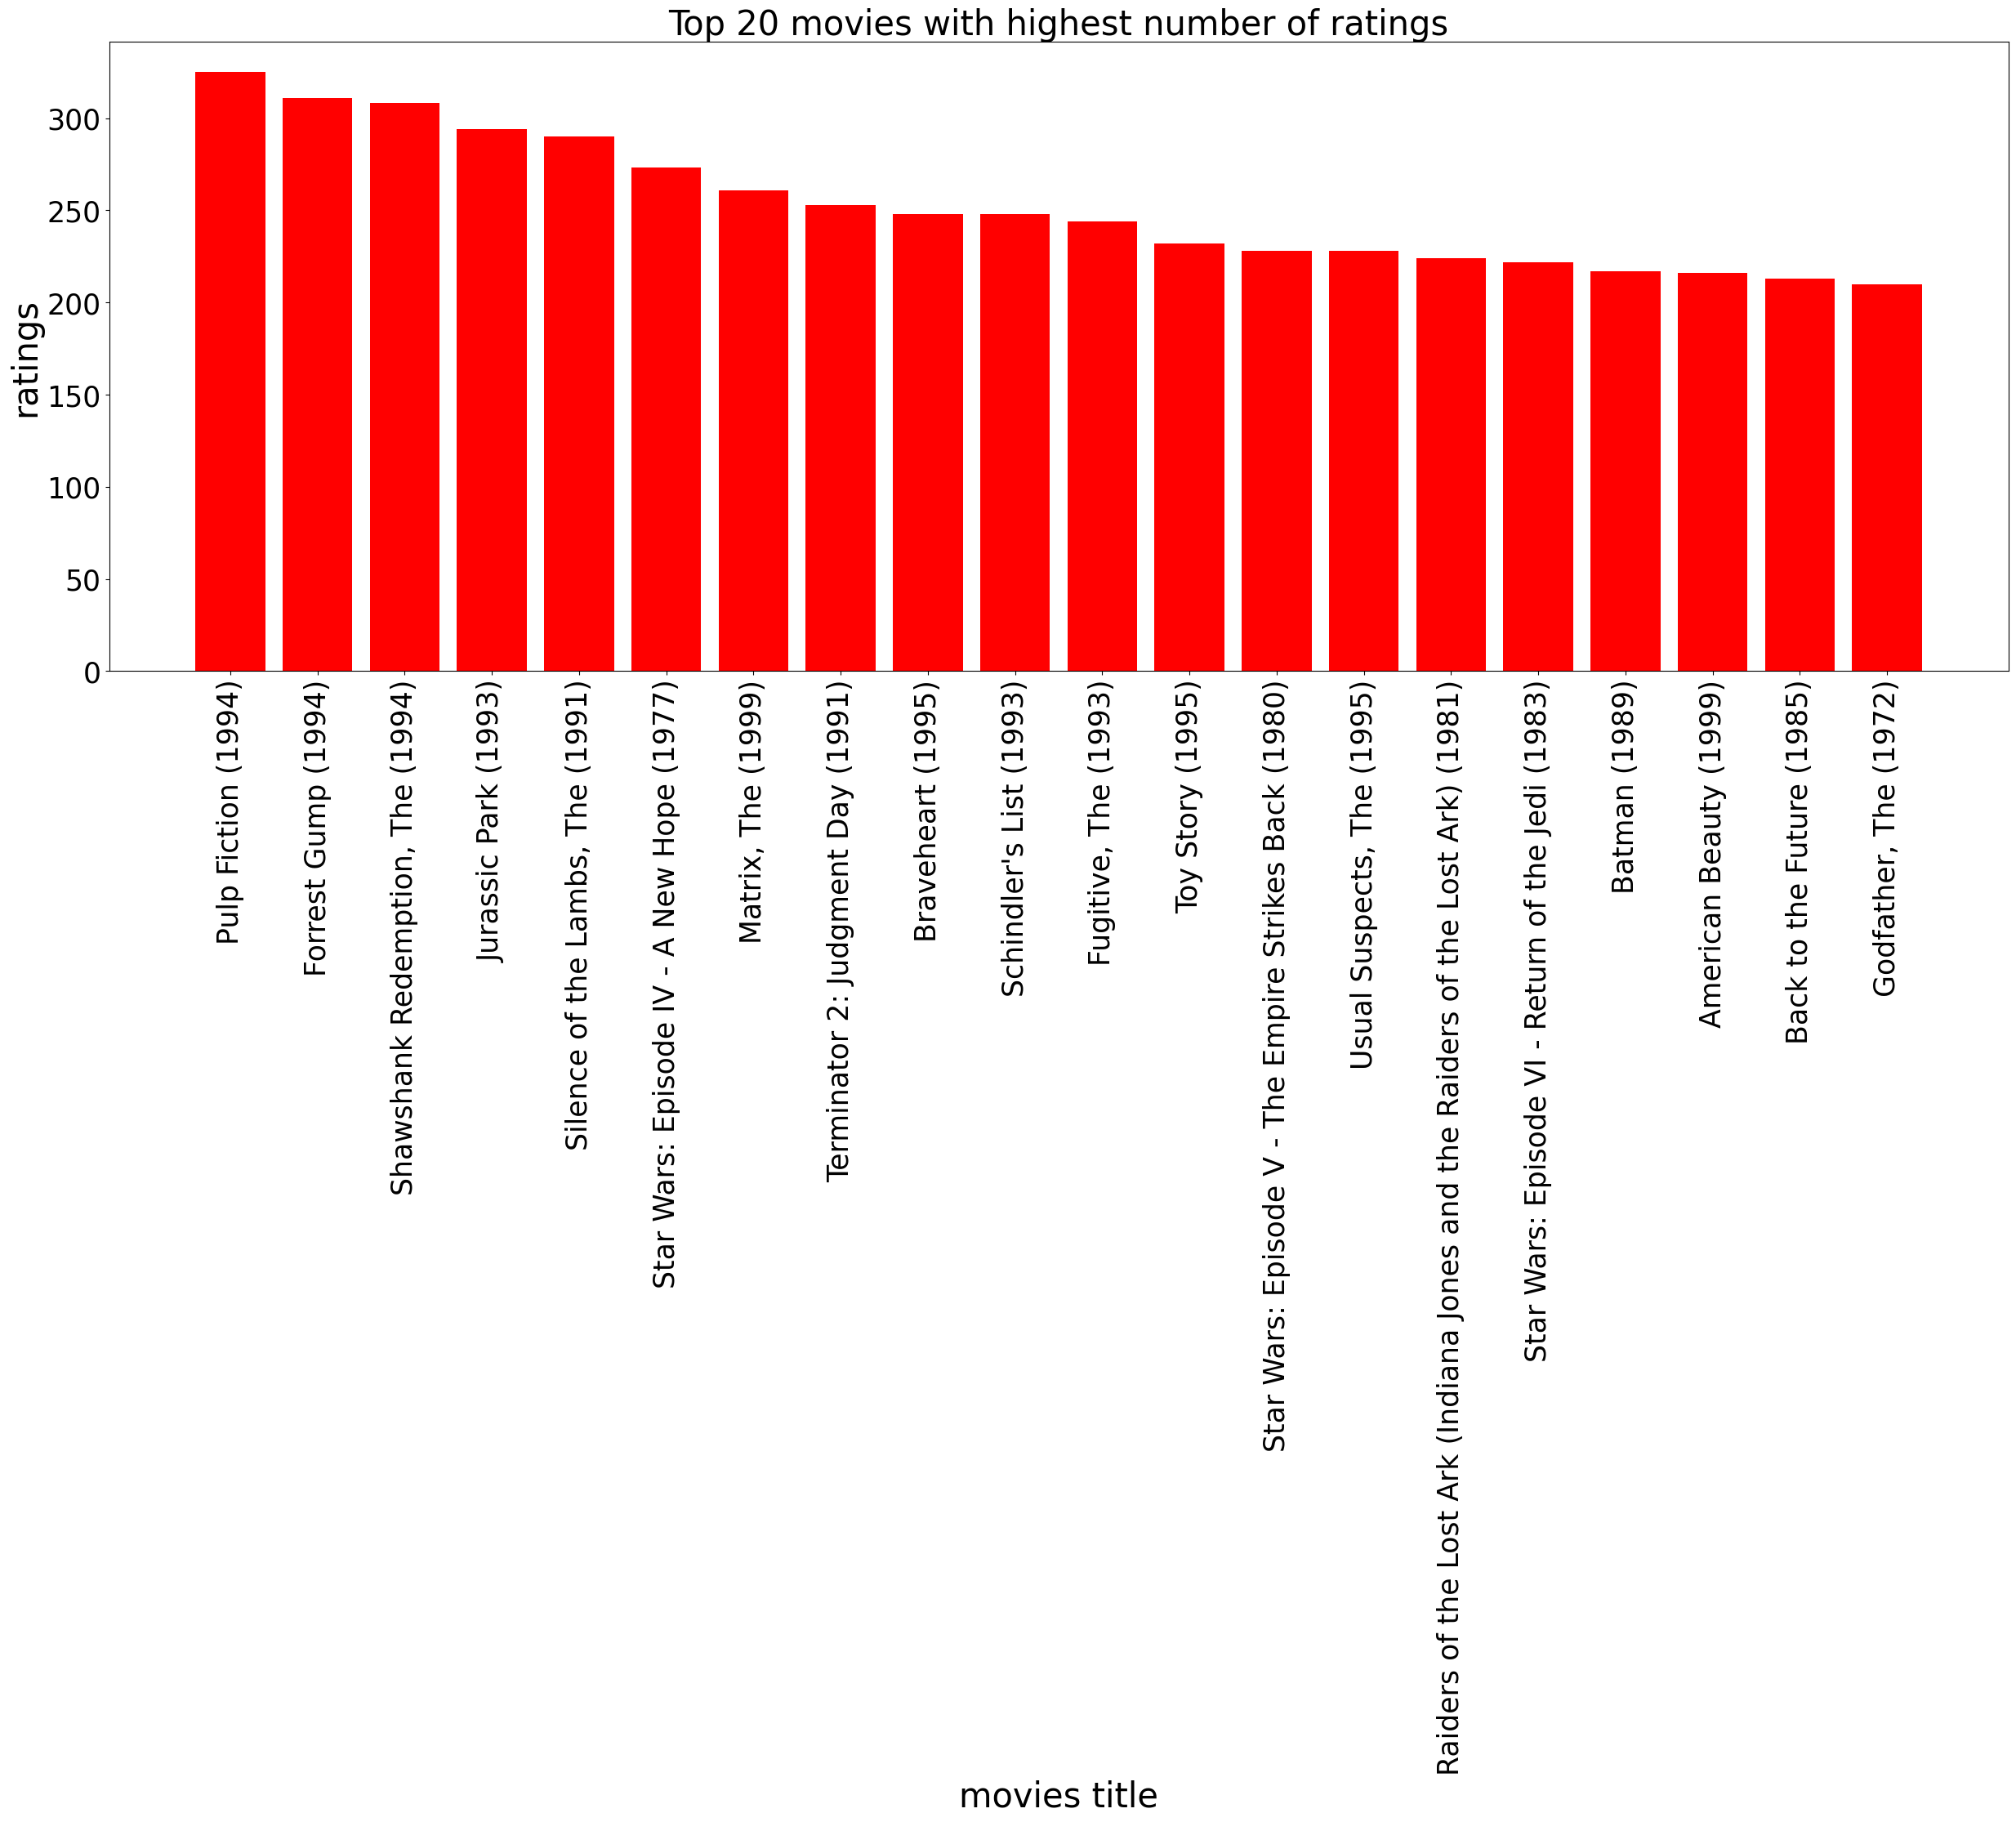

In [17]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

In [20]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [21]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [23]:
recommendations('(500) Days of Summer (2009)')

10                  American President, The (1995)
48                         Mighty Aphrodite (1995)
53               Postman, The (Postino, Il) (1994)
86                          Beautiful Girls (1996)
168                 Something to Talk About (1995)
195                        Don Juan DeMarco (1995)
203    Eat Drink Man Woman (Yin shi nan nu) (1994)
250                           Nobody's Fool (1994)
311                        Corrina, Corrina (1994)
320                  It Could Happen to You (1994)
331                           Reality Bites (1994)
482                    Sleepless in Seattle (1993)
485                              Son in Law (1993)
631                    Month by the Lake, A (1995)
659                     Walking and Talking (1996)
682                                    Emma (1996)
693                                 Tin Cup (1996)
715                           Twelfth Night (1996)
719                 Philadelphia Story, The (1940)
730                          Ap